In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df =  pd.read_csv("weight-height.csv")
df = df.drop('Weight', axis='columns')
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


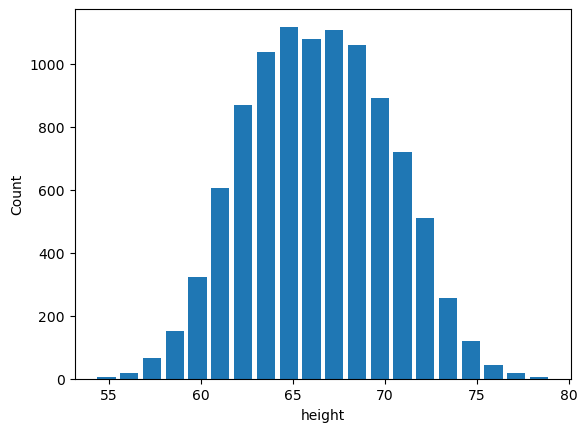

In [9]:
plt.hist(df.Height, bins=20,rwidth=0.8)
plt.xlabel('height')
plt.ylabel('Count')
plt.show()

### We can observe that this Dataset Follows Bell Curve, so lets try to draw the Bell Curve along with this graph

In [6]:
from scipy.stats import norm

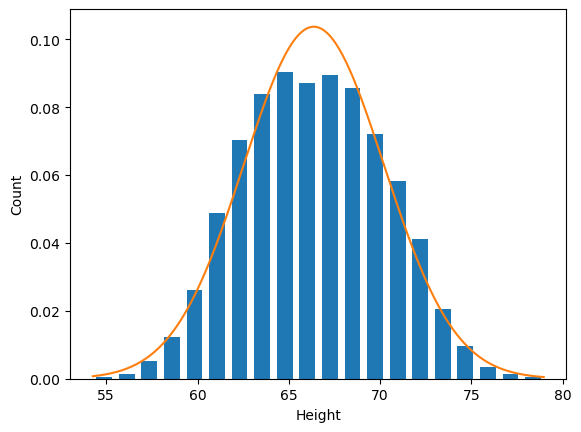

In [11]:
import numpy as np
plt.hist(df.Height, bins=20 , rwidth=0.7, density=True)
plt.xlabel('Height')
plt.ylabel('Count')
rnge = np.arange(df.Height.min(), df.Height.max(),0.1)
plt.plot(rnge, norm.pdf(rnge, df.Height.mean(), df.Height.std()))

In [18]:
df.Height.std()

3.8475281207732324

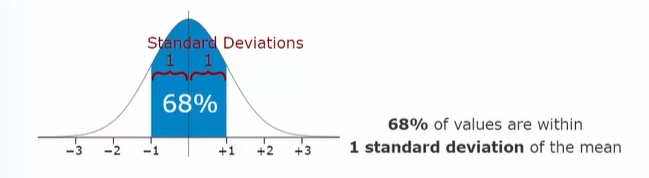

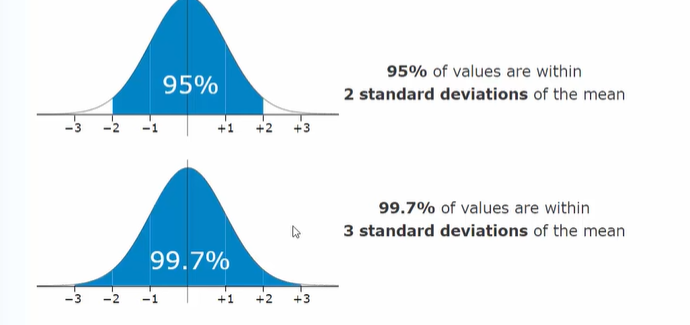

### For Larger Datasets we will take about 4-5 standard Deviations as the threshold values for Outlier
### For smaller Datasets we will take about 2 Sd's

### For out ds, lets take 3 sd's

In [19]:
upper_threshold = df.Height.mean() + 3*df.Height.std()
upper_threshold

np.float64(77.91014411714094)

In [20]:
lower_threshold = df.Height.mean() - 3*df.Height.std()
lower_threshold

np.float64(54.82497539250154)

In [22]:
df[(df.Height < lower_threshold) | (df.Height > upper_threshold)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


#### So there are 7 Outlier. While in a project we should consult witht eh client whether can we remove these values or not adn then proceed with building the model

In [23]:
df_outlier_removed = df[(df.Height > lower_threshold) & (df.Height < upper_threshold)]
df_outlier_removed.shape[0]

9993

In [24]:
df_outlier_removed.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


## Histogram after removing Outliers

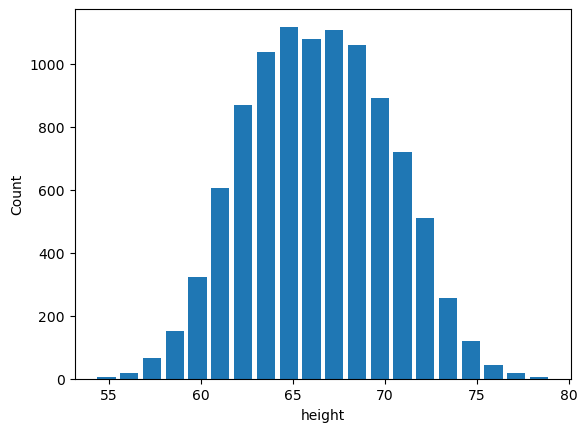

In [25]:
plt.hist(df.Height, bins=20,rwidth=0.8)
plt.xlabel('height')
plt.ylabel('Count')
plt.show()